In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def plot_distances(distances):
    fig, ax = plt.subplots()
    
    ax.plot(distances)
    
    plt.show()

def scatter_points(points, real_points):
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.set_xlim([-90,90])
    ax.set_ylim([-90,90])

    ax.plot(points[0],points[1])
    ax.plot(real_points[0],real_points[1])
    
    plt.show()

In [4]:
def ideal_box_distances(radius):
    # Hypotenuse = radius / cos(theta)
    first_45  = np.full(46, radius) / np.cos(np.radians(np.arange(46)))
    second_45 = np.flip(first_45, axis=0)[1:]
    ninety = np.concatenate((first_45, second_45), axis=None)
    trimmed_ninety = ninety[1:]
    return np.concatenate((ninety, trimmed_ninety, trimmed_ninety, trimmed_ninety[:-1]), axis=None)

In [5]:
def distances_to_coords(distances, center):
    x_coords = center[0] + (distances * np.sin(np.radians(np.arange(360))))
    y_coords = center[1] + (distances * np.cos(np.radians(np.arange(360))))
    return x_coords, y_coords

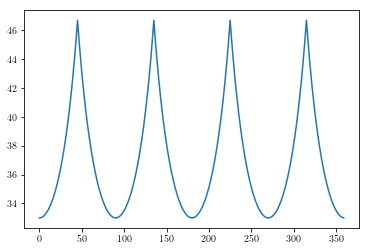

In [6]:
ideal_distances = ideal_box_distances(33)

plot_distances(ideal_distances)

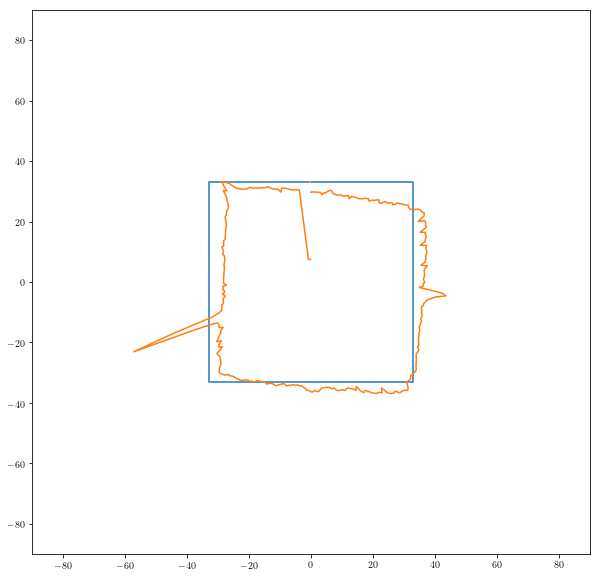

In [7]:
real_distances = np.array([222.58, 223.30, 223.30, 222.58, 223.30, 223.30, 223.30, 216.21, 223.30, 223.30, 228.53, 233.18, 235.57, 230.83, 225.52, 225.52, 225.52, 225.52, 228.53, 228.53, 228.53, 230.06, 233.18, 235.57, 227.01, 238.83, 238.01, 240.49, 240.49, 240.49, 243.87, 246.47, 251.81, 254.55, 257.36, 251.81, 260.21, 263.13, 270.17, 274.34, 267.11, 270.17, 284.18, 284.18, 287.60, 295.87, 292.27, 308.46, 312.43, 317.86, 322.05, 329.25, 324.90, 326.34, 330.73, 346.17, 351.05, 351.05, 356.07, 351.05, 324.90, 344.57, 344.57, 339.84, 339.84, 313.77, 329.25, 326.34, 326.34, 320.64, 316.49, 298.31, 317.86, 312.43, 312.43, 312.43, 308.46, 304.58, 304.58, 300.79, 299.55, 284.18, 304.58, 295.87, 292.27, 292.27, 292.27, 292.27, 288.75, 288.75, 292.27, 287.60, 287.60, 275.41, 312.43, 351.05, 362.95, 330.73, 317.86, 304.58, 300.79, 295.87, 295.87, 291.09, 292.27, 295.87, 295.87, 300.79, 300.79, 299.55, 304.58, 304.58, 304.58, 304.58, 308.46, 312.43, 312.43, 316.49, 317.86, 322.05, 326.34, 330.73, 330.73, 339.84, 339.84, 339.84, 344.57, 351.05, 356.07, 361.21, 368.28, 373.75, 373.75, 373.75, 371.91, 379.36, 379.36, 377.47, 393.07, 401.31, 393.07, 391.06, 391.06, 377.47, 379.36, 375.60, 368.28, 342.98, 357.77, 351.05, 351.05, 346.17, 339.84, 330.73, 324.90, 329.25, 320.64, 300.79, 312.43, 304.58, 300.79, 295.87, 295.87, 300.79, 295.87, 295.87, 295.87, 292.27, 284.18, 285.31, 280.83, 277.55, 277.55, 277.55, 277.55, 280.83, 288.75, 287.60, 284.18, 288.75, 288.75, 284.18, 284.18, 277.55, 274.34, 270.17, 271.20, 268.12, 270.17, 270.17, 270.17, 274.34, 274.34, 278.64, 273.29, 273.29, 277.55, 280.83, 286.45, 285.31, 284.18, 284.18, 287.60, 292.27, 287.60, 288.75, 292.27, 292.27, 295.87, 304.58, 304.58, 308.46, 308.46, 311.09, 317.86, 322.05, 322.05, 324.90, 324.90, 326.34, 330.73, 330.73, 339.84, 342.98, 346.17, 344.57, 335.23, 322.05, 316.49, 312.43, 308.46, 309.77, 309.77, 281.94, 292.27, 287.60, 273.29, 287.60, 277.55, 270.17, 260.21, 257.36, 245.60, 257.36, 254.55, 254.55, 257.36, 322.05, 541.73, 401.31, 263.13, 238.01, 227.01, 225.52, 224.04, 223.30, 215.52, 214.84, 214.16, 214.16, 206.29, 206.29, 214.16, 205.66, 205.03, 210.82, 208.86, 209.50, 197.75, 206.93, 206.93, 206.93, 206.93, 206.93, 206.93, 206.93, 206.93, 206.93, 206.93, 207.57, 208.86, 210.82, 210.82, 211.48, 211.48, 212.14, 214.84, 216.21, 224.77, 224.04, 225.52, 229.29, 234.77, 230.83, 233.18, 235.57, 238.01, 235.57, 238.01, 240.49, 243.87, 246.47, 249.11, 251.81, 254.55, 257.36, 263.13, 270.17, 276.48, 276.48, 280.83, 284.18, 285.31, 288.75, 295.87, 308.46, 316.49, 339.84, 330.73, 364.71, 356.07, 346.17, 320.64, 312.43, 304.58, 300.79, 295.87, 295.87, 294.66, 287.60, 284.18, 280.83, 277.55, 275.41, 272.24, 270.17, 270.17, 265.11, 257.36, 255.48, 251.81, 249.11, 238.01, 249.11, 249.11, 246.47, 243.87, 240.49, 238.01, 235.57, 235.57, 233.18, 233.97, 232.39, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00])
real_coords = distances_to_coords(real_distances/10 + 7.5, (0,0))

coords = distances_to_coords(ideal_distances, (0,0))

scatter_points(coords, real_coords)

In [8]:
def calculate_error(ideal_distances, real_distances):
    return np.sum(np.absolute(ideal_distances - real_distances))

In [9]:
print(calculate_error(ideal_distances, real_distances/10 + 7.5))

1483.8077708514215
